In [42]:
print("Om Sri Sai Ram")

Om Sri Sai Ram


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from xgboost import XGBRegressor

In [98]:
data=pd.read_csv('/content/HousingData.csv')

In [99]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [100]:
data.shape

(506, 14)

In [101]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [102]:
data.shape

(506, 14)

In [103]:
data.dropna().shape

(394, 14)

In [104]:
X=data.drop(columns='MEDV',axis=1)
Y=data['MEDV']

<Axes: >

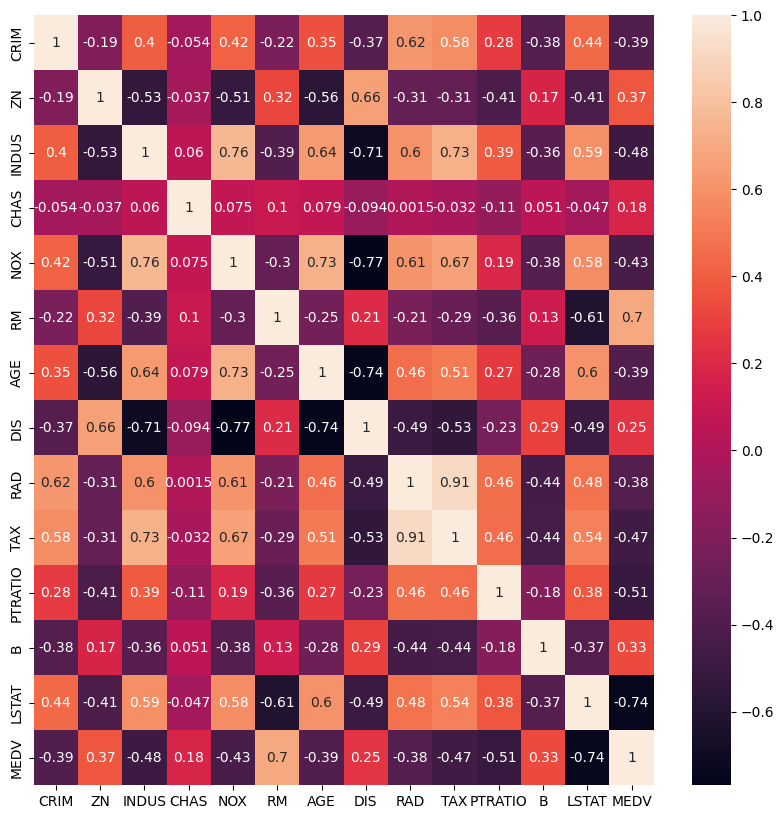

In [105]:
correlated_data=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlated_data,cbar=True,annot=True)

In [106]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [107]:
model=XGBRegressor()

In [108]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [110]:

train_predict=model.predict(X_train)
train_r2accuracy=r2_score(Y_train,train_predict)
train_msr=mean_absolute_error(Y_train,train_predict)
print(train_r2accuracy,train_msr)

0.9999970506674762 0.011185854968458139


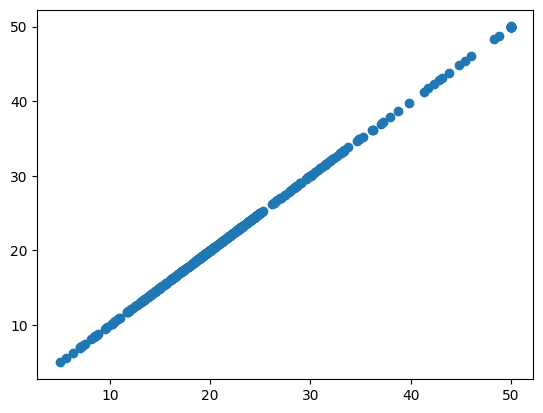

In [112]:
plt.scatter(Y_train,train_predict)

In [111]:

test_predict=model.predict(X_test)
test_r2accuracy=r2_score(Y_test,test_predict)
test_msr=mean_absolute_error(Y_test,test_predict)
print(test_r2accuracy,test_msr)

0.8361097215940602 2.466887313244389


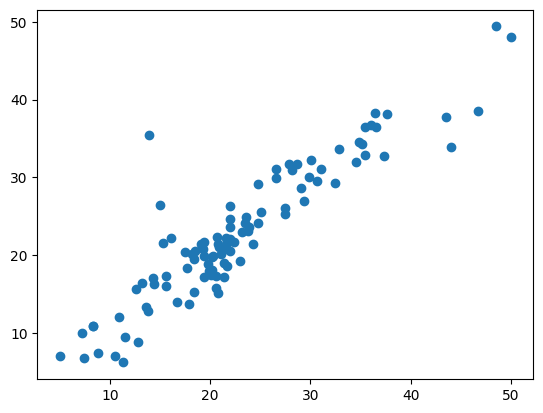

In [113]:
plt.scatter(Y_test,test_predict)